In [1]:
import pandas as pd
import numpy as np
from numpy import random
import math
import scipy.stats as stats
import statistics

import matplotlib.pyplot as plt
import seaborn as sns

import os
heart = pd.read_csv("C:/Users/prakr/Downloads/pdata/data sets/Heart Attack Analysis & Prediction Dataset/heart.csv")
heart.shape

Matplotlib is building the font cache; this may take a moment.


(303, 14)

## 1. Descriptive Statistics

DESCRIPTIVE STATISTICS is a form of analysis that is used for describing, summarizing, or showing the data in a meaningful way, and describes the main features of a dataset.

### 1.1 Frequency Distribution Table

Frequency Distribution Table is a summary of the values and their absolute and relative frequencies

In [6]:
#  Heart Attack Analysis & Prediction Dataset [Age]
#  frequency distribution table
interval_range = pd.interval_range(start=0, end=100, freq=10)
age_ranges = heart['age'].value_counts(bins = interval_range).sort_values()

freq = pd.DataFrame()
freq['Age'] = age_ranges.index
freq['Absolute Frequency'] = age_ranges.values
freq['Relative Frequency, %'] = round(freq['Absolute Frequency']*100/len(heart['age']),4)
freq = freq.sort_values(by = ['Age']).reset_index(drop=True)

totals_row = {'Age':'-total-', 'Absolute Frequency':freq['Absolute Frequency'].sum(), 'Relative Frequency, %':freq['Relative Frequency, %'].sum()}
totals_row_df = pd.DataFrame([totals_row])
freq = pd.concat([freq, totals_row_df], ignore_index=True)

print(freq)

          Age  Absolute Frequency  Relative Frequency, %
0     (0, 10]                   0                 0.0000
1    (10, 20]                   0                 0.0000
2    (20, 30]                   1                 0.3300
3    (30, 40]                  18                 5.9406
4    (40, 50]                  76                25.0825
5    (50, 60]                 129                42.5743
6    (60, 70]                  73                24.0924
7    (70, 80]                   6                 1.9802
8    (80, 90]                   0                 0.0000
9   (90, 100]                   0                 0.0000
10    -total-                 303               100.0000


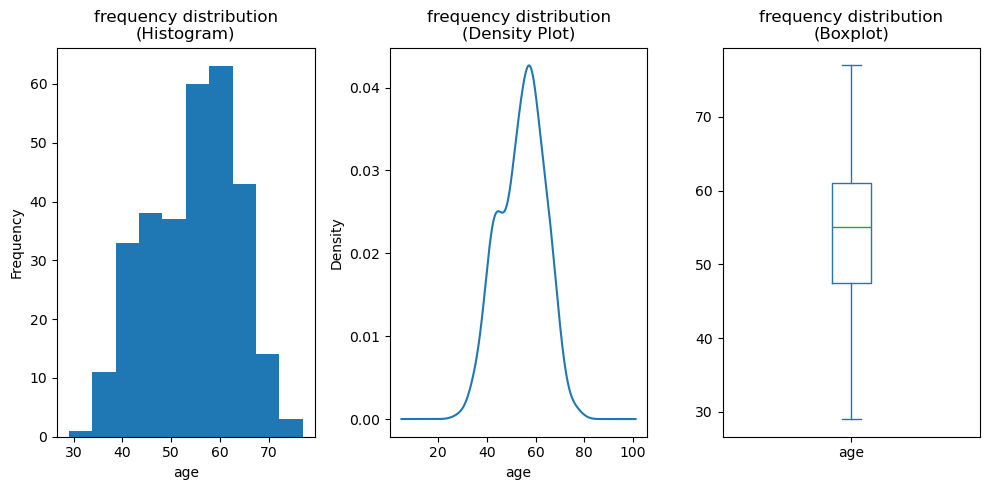

In [7]:
#  Frequency Distribution Plots
fig = plt.figure(figsize=(10,5))
plt.subplot(131)
plt.title('frequency distribution\n(Histogram)')
heart['age'].plot(kind='hist')
plt.xlabel('age')

plt.subplot(132)
plt.title('frequency distribution\n(Density Plot)')
heart['age'].plot(kind='kde')
plt.xlabel('age')

plt.subplot(133)
plt.title('frequency distribution\n(Boxplot)')
heart['age'].plot(kind='box')

plt.tight_layout()
plt.show()

In [8]:
#  create data frame from tuples
x = (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20)
y = (1,2,3,4,5,6,7,8,9,10,11,12,13,14,44,66,66,44,19,20)
z = (-20,-19,-44,-66,-66,-44,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1)

df = pd.DataFrame({'x': x,'y':y,'z':z})
df.transpose()  # print dataframe transpose

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
x,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
y,1,2,3,4,5,6,7,8,9,10,11,12,13,14,44,66,66,44,19,20
z,-20,-19,-44,-66,-66,-44,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1


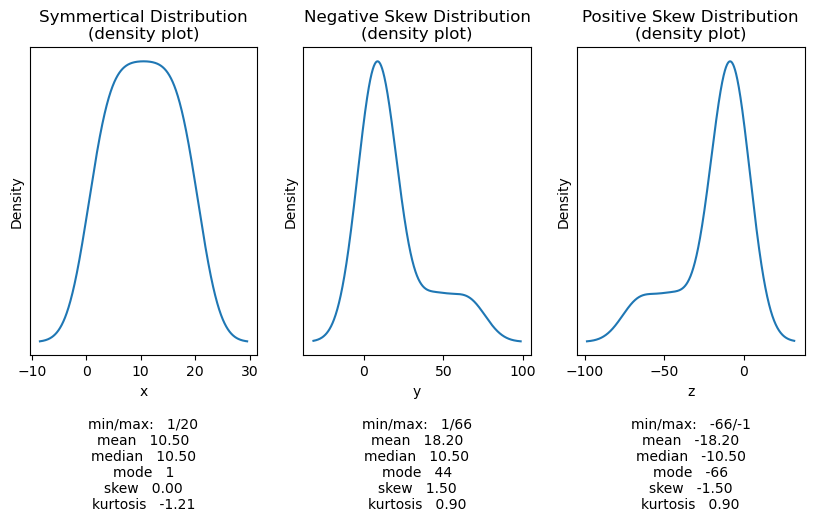

In [9]:
#  function - print central tendencies values
#  return text for x-axis label
def getCT(*args):
    for i in args:
        txt =  "min/max:   {:,.0f}/{:,.0f}\n".format(min(i),max(i))
        txt += "mean   {:,.2f}\n".format(np.mean(i))
        txt += "median   {:,.2f}\n".format(np.median(i))
        txt += "mode   {}\n".format(stats.mode(i)[0])
        txt += "skew   {:,.2f}\n".format(stats.skew(i))
        txt += "kurtosis   {:,.2f}".format(stats.kurtosis(i))
    return txt


#  density plots of the distributions
fig = plt.figure(figsize=(10,4))
plt.subplot(131)
x_label = getCT(df.x)
plt.title('Symmertical Distribution\n(density plot)')
plt.xlabel("x\n\n{}".format(x_label))
plt.yticks([])
df.x.plot(kind='kde')   #  skew = 0, symmetric

plt.subplot(132)
x_label = getCT(df.y)
plt.title('Negative Skew Distribution\n(density plot)')
plt.xlabel("y\n\n{}".format(x_label))
plt.yticks([])
df.y.plot(kind='kde')   #  skew < 0, left- hand side tail

plt.subplot(133)
x_label = getCT(df.z)
plt.title('Positive Skew Distribution\n(density plot)')
plt.xlabel("z\n\n{}".format(x_label))
plt.yticks([])
df.z.plot(kind='kde')   #  skew > 0, right-hand side tail
plt.show()

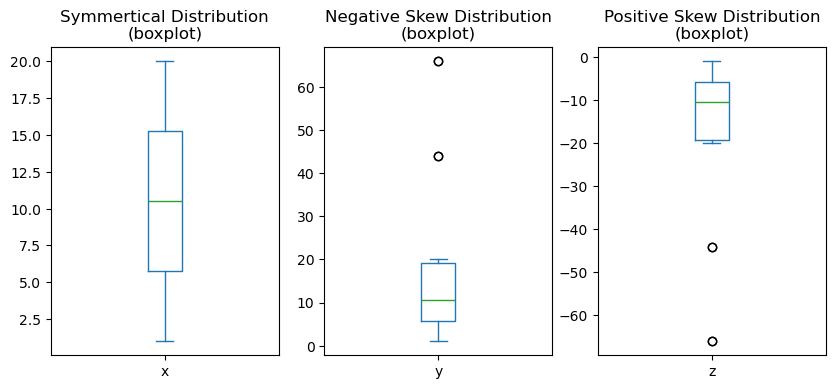

In [10]:
#  boxplots plots of the distributions
fig = plt.figure(figsize=(10,4))
plt.subplot(131)
plt.title('Symmertical Distribution\n(boxplot)')
df.x.plot(kind='box')   #  skew = 0, symmetric

plt.subplot(132)
plt.title('Negative Skew Distribution\n(boxplot)')
df.y.plot(kind='box')   #  skew < 0, left- hand side tail

plt.subplot(133)
plt.title('Positive Skew Distribution\n(boxplot)')
df.z.plot(kind='box')   #  skew > 0, right-hand side tail
plt.show()

## Measure of Dispersion

In [12]:
print(f"\n{'POPULATION - Dispersion for df.x'}",
      f"\n{'Population Variance:':<35}{statistics.pvariance(df.x):>10,.4f}",
      f"\n{'Population Standard Deviation':<35}{statistics.pstdev(df.x):>10,.4f}",
      f"\n{'Population Coefficient of Variance:':<35}{statistics.pstdev(df.x)/np.mean(df.x):>10,.4f}",
    
      f"\n\n{'SAMPLE - Dispersion for df.x'}",
      f"\n{'Sample Variance:':<35}{statistics.variance(df.x):>10,.4f}",
      f"\n{'Sample Standard Deviation':<35}{statistics.stdev(df.x):>10,.4f}",
      f"\n{'Sample Coefficient of Variance:':<35}{statistics.stdev(df.x)/np.mean(df.x):>10,.4f}")


POPULATION - Dispersion for df.x 
Population Variance:                  33.2500 
Population Standard Deviation          5.7663 
Population Coefficient of Variance:    0.5492 

SAMPLE - Dispersion for df.x 
Sample Variance:                      35.0000 
Sample Standard Deviation              5.9161 
Sample Coefficient of Variance:        0.5634


### Covariance

In [14]:
df.cov()

,x,y,z
x,35.000000,83.368421,83.368421
y,83.368421,407.115789,194.147368
z,83.368421,194.147368,407.115789


### Correlation Coefficient

In [16]:
df.corr()

,x,y,z
x,1.000000,0.698407,0.698407
y,0.698407,1.000000,0.476885
z,0.698407,0.476885,1.000000


<Axes: >

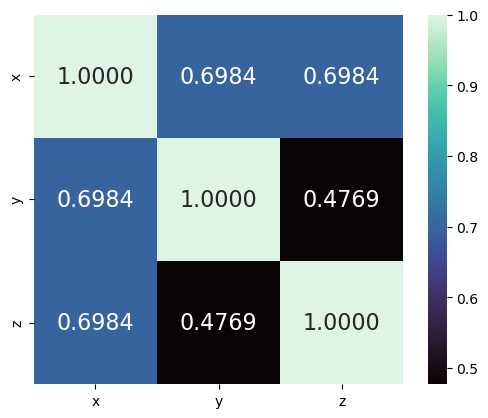

In [17]:
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 16}, fmt='.4f', square=True, cmap='mako')

# 2 Inferential Statistics

## Confidence Interval with Z-Statistics

C:\Users\prakr\AppData\Local\Temp\ipykernel_5052\3701927890.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart['age'], hist=False)


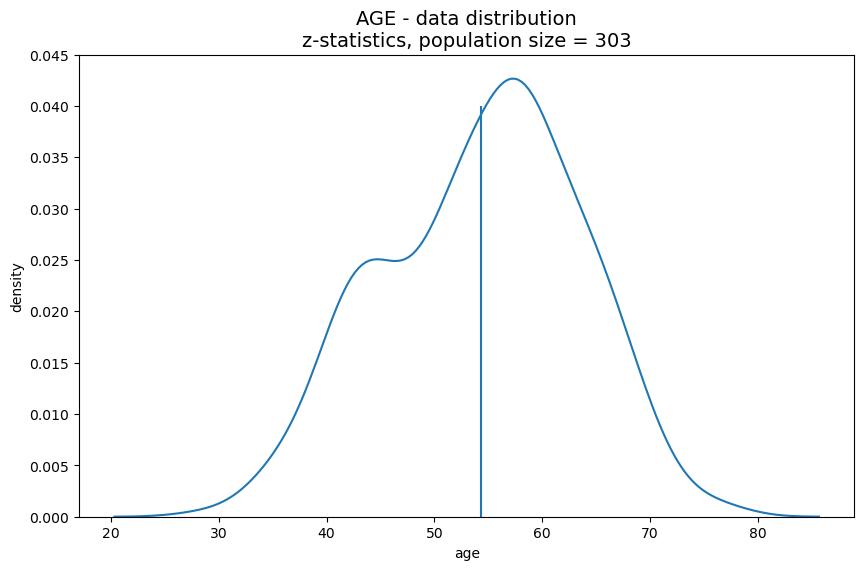

mean:                  54.3663
standard deviation:     9.0821
standard error:         0.5218


In [20]:
#  PLOT - Heart Attack, Cholesterol
plt.figure(figsize=(10,6))
sns.distplot(heart['age'], hist=False)

plt.title('AGE - data distribution\nz-statistics, population size = {}'.format(len(heart['age'])), fontsize=14)
plt.ylabel('density')
plt.vlines(np.mean(heart['age']),0,.04)
plt.ylim([0,0.045])
plt.show()

#  mean, standard deviation and standard error
mean  = np.mean(heart['age'])           # mean
sigma = statistics.stdev(heart['age'])  # standard deviation
sem   = stats.sem(heart['age'])         # standard error


print('mean:{:>25.4f}'.format(mean))
print('standard deviation:{:>11.4f}'.format(sigma))
print('standard error:{:>15.4f}'.format(sem))

#### Critical Value lookup in z-table

In [22]:
confidenceLevel = .90
numOfTails      = 2
alpha           = (1 - confidenceLevel)/numOfTails

#  Percent Point Function
#  - calculates z-critical from (1-alpha)
z_critical = stats.norm.ppf(1 - alpha)

print('Step 2a:  Calculate z-critical for Confidence Level {:.0%} with {} tails.'.format(confidenceLevel,numOfTails))
print('Confidence Level:\t{:.0%}'.format(confidenceLevel))
print('Number of Tails:\t{}'.format(numOfTails))
print('alpha:\t\t\t{:.4f}'.format(alpha))
print('z-critical value:\t{:.4f}  <---'.format(z_critical))

Step 2a:  Calculate z-critical for Confidence Level 90% with 2 tails.
Confidence Level:	90%
Number of Tails:	2
alpha:			0.0500
z-critical value:	1.6449  <---


In [23]:
print('Step 2b:  Calculate z-critical for several Confidence Levels with 1 and 2 tails.')

#--- func for critical value ---
def z_crit(cl,tail):
    alpha = (1-cl)/tail
    z_critical = stats.norm.ppf(1 - alpha)
    print('conf level {:.0%}'.format(cl), end="")
    print('  tails {}'.format(tail), end="")
    print('  alpha {:.4f}'.format(alpha), end="")
    print('\t-->  z-critical:  {:.4f}'.format(z_critical))
    return

#  Confidence Levels at 75%, 90% and 99% with 1 or 2 tails
confidenceLevel = [.75, .90, .99]
numOfTails      = [1,2]

for i in confidenceLevel:
    for j in numOfTails:
        z_crit(i,j)

Step 2b:  Calculate z-critical for several Confidence Levels with 1 and 2 tails.
conf level 75%  tails 1  alpha 0.2500	-->  z-critical:  0.6745
conf level 75%  tails 2  alpha 0.1250	-->  z-critical:  1.1503
conf level 90%  tails 1  alpha 0.1000	-->  z-critical:  1.2816
conf level 90%  tails 2  alpha 0.0500	-->  z-critical:  1.6449
conf level 99%  tails 1  alpha 0.0100	-->  z-critical:  2.3263
conf level 99%  tails 2  alpha 0.0050	-->  z-critical:  2.5758


### Calculate the Confidence Interval

In [25]:
confidenceLevel = .95
numOfTails      = 2
alpha           = (1 - confidenceLevel)/numOfTails
z_critical      = stats.norm.ppf(1 - alpha)

# confidence interval formula (manual)
lowerCI = mean - (z_critical * sigma)
upperCI = mean + (z_critical * sigma)

#  print confidence intervals
print('Confidence Level:\t{:.0%}'.format(confidenceLevel))
print('Number of Tails:\t{}'.format(numOfTails))
print('alpha:\t\t\t{:.4f}'.format(alpha))
print('z-critical value:\t{:.4f}  <---'.format(z_critical))
print('\nConfidence Interval:\nlower CI\t\t{:.4f}'.format(lowerCI))
print('upper CI:\t\t{:.4f}'.format(upperCI))

Confidence Level:	95%
Number of Tails:	2
alpha:			0.0250
z-critical value:	1.9600  <---

Confidence Interval:
lower CI		36.5657
upper CI:		72.1669


### Plotting Confidence Interval for Confidence Level of 95%

C:\Users\prakr\AppData\Local\Temp\ipykernel_5052\1853292296.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart['age'], hist=False)


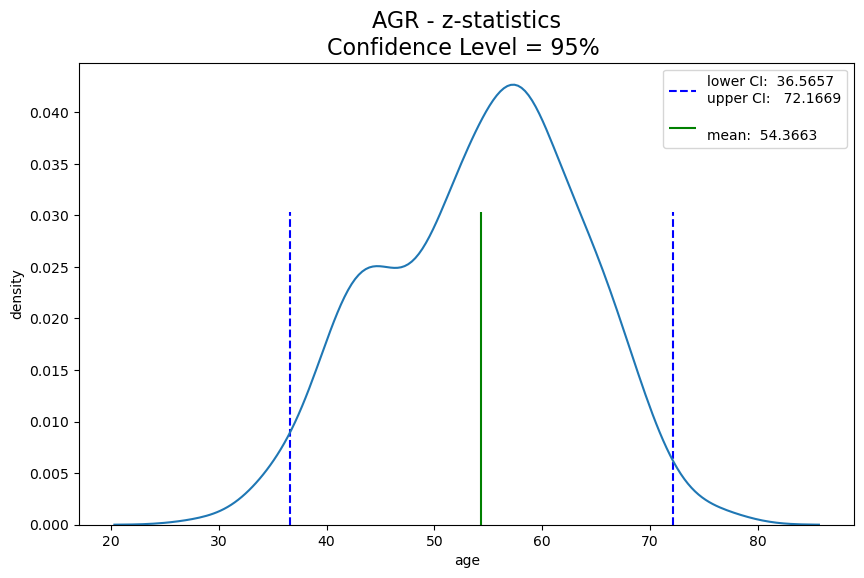

Z-Statistics - CONCLUSION:
95% of the total patients in the Heart Attack dataset will have cholesterol levels between 36 and 73.


In [27]:
#  PLOT CONFIDENCE INTERVAL
plt.figure(figsize=(10,6))
plt.title('AGR - z-statistics\nConfidence Level = {:.0%} '.format(confidenceLevel), fontsize=16)
#plt.title('Z-Statistic - Confidence Intervals at {:.0%}\n(cholesterol level)'.format(confidenceLevel), fontsize=18)
plt.xlabel('cholesterol level')
plt.ylabel('density')

labelCI=("lower CI:  {:.4f}\nupper CI:   {:.4f}".format(lowerCI,upperCI))
labelME=("\nmean:  {:.4f}".format(mean))
plt.vlines([lowerCI,upperCI],0,np.mean(stats.norm.pdf(heart['age'], loc=mean, scale=sigma)),label=labelCI,color='blue',ls='--')
plt.vlines(mean,0,np.mean(stats.norm.pdf(heart['age'], loc=mean, scale=sigma)),label=labelME,color='green')
plt.legend(loc='best')

sns.distplot(heart['age'], hist=False)
plt.show()

print("Z-Statistics - CONCLUSION:")
print("{:.0%} of the total patients in the Heart Attack dataset will have cholesterol levels between {} and {}.".format(confidenceLevel, math.floor(lowerCI), math.ceil(upperCI)))

## Confidence Interval with T-Statistics

C:\Users\prakr\AppData\Local\Temp\ipykernel_5052\3278502585.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_age_sample, hist=False)


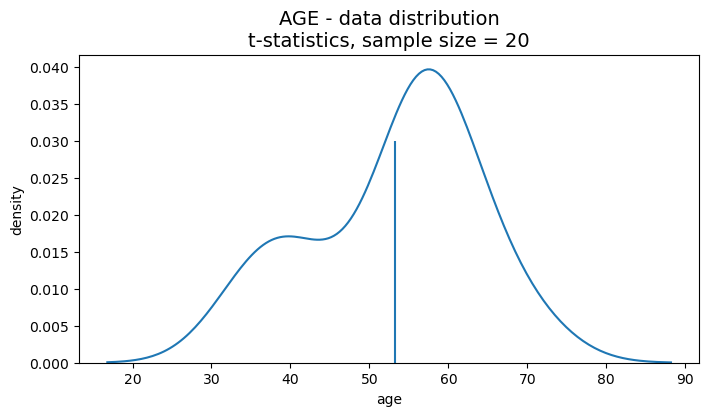

mean:			53.2000
standard deviation:	10.4307
standard error:		2.3324


In [29]:
#  DATA - Heart Attack, AGE - sample
n = 20
heart_age_sample = heart['age'].sample(n)  # sample

#  plot the data
plt.figure(figsize=(8,4))
plt.title('AGE - data distribution\nt-statistics, sample size = {}'.format(len(heart_age_sample)), fontsize=14)
plt.ylabel('density')
plt.vlines(np.mean(heart_age_sample),0,.03)
sns.distplot(heart_age_sample, hist=False)
plt.show()


#  mean, standard deviation and standard error
mean  = np.mean(heart_age_sample)           # mean
s     = statistics.stdev(heart_age_sample)  # standard deviation
sem   = stats.sem(heart_age_sample)         # standard error

print('mean:\t\t\t{:.4f}'.format(mean))
print('standard deviation:\t{:.4f}'.format(s))
print('standard error:\t\t{:.4f}'.format(sem))

#### Critical Value lookup in t-table

In [31]:
confidenceLevel = .90
n               = 10
ddof            = n-1
numOfTails      = 2
alpha           = (1 - confidenceLevel)/numOfTails

#  Percent Point Function
#  - calculates t-critical from alpha and ddof
t_critical = abs(stats.t.ppf(alpha/numOfTails, ddof))

print('Step 2a:  Calculate z-critical for Confidence Level {:.0%} with {} tails.'.format(confidenceLevel,numOfTails))
print('Confidence Level:\t{:.0%}'.format(confidenceLevel))
print('Number of Tails:\t{}'.format(numOfTails))
print('Degrees of Freedom:\t{}'.format(ddof))
print('alpha:\t\t\t{:.4f}'.format(alpha))
print('t-critical value:\t{:.4f}  <---'.format(t_critical))

Step 2a:  Calculate z-critical for Confidence Level 90% with 2 tails.
Confidence Level:	90%
Number of Tails:	2
Degrees of Freedom:	9
alpha:			0.0500
t-critical value:	2.2622  <---


In [32]:
print('Step 2b:  Calculate t-critical for several Confidence Levels with 1 and 2 tails.')

#--- func for critical value ---
def t_crit(cl,tail,ddof):
    alpha = (1-cl)/tail
    t_critical = abs(stats.t.ppf(alpha/tail,ddof))
    print('conf level {:.0%}'.format(cl), end="")
    print('  tails {}'.format(tail), end="")
    print('  ddof {}'.format(ddof), end="")
    print('  alpha {:.4f}'.format(alpha), end="")
    print('\t-->  t-critical:  {:.4f}'.format(t_critical))
    return


#  Confidence Levels at 75%, 90% and 99% with 1 or 2 tails
confidenceLevel = [.75, .90, .99]
numOfTails      = [1,2]
n               = 10
ddof            = n - 1

for i in confidenceLevel:
    for j in numOfTails:
        t_crit(i,j,ddof)

Step 2b:  Calculate t-critical for several Confidence Levels with 1 and 2 tails.
conf level 75%  tails 1  ddof 9  alpha 0.2500	-->  t-critical:  0.7027
conf level 75%  tails 2  ddof 9  alpha 0.1250	-->  t-critical:  1.6915
conf level 90%  tails 1  ddof 9  alpha 0.1000	-->  t-critical:  1.3830
conf level 90%  tails 2  ddof 9  alpha 0.0500	-->  t-critical:  2.2622
conf level 99%  tails 1  ddof 9  alpha 0.0100	-->  t-critical:  2.8214
conf level 99%  tails 2  ddof 9  alpha 0.0050	-->  t-critical:  3.6897


In [33]:
confidenceLevel = .95
n               = 10
ddof            = n -1
numOfTails      = 2
alpha           = (1 - confidenceLevel)/numOfTails
t_critical      = abs(stats.t.ppf(alpha/numOfTails,ddof))

# confidence interval formula
lowerCI = mean - (t_critical * s)
upperCI = mean + (t_critical * s)

#  print confidence intervals
print('Confidence Level:\t{:.0%}'.format(confidenceLevel))
print('Number of Tails:\t{}'.format(numOfTails))
print('Degrees of Freedom:\t{}'.format(ddof))
print('alpha:\t\t\t{:.4f}'.format(alpha))
print('t-critical value:\t{:.4f}  <---'.format(t_critical))
print('\nConfidence Interval:\nlower CI\t\t{:.4f}'.format(lowerCI))
print('upper CI:\t\t{:.4f}'.format(upperCI))

Confidence Level:	95%
Number of Tails:	2
Degrees of Freedom:	9
alpha:			0.0250
t-critical value:	2.6850  <---

Confidence Interval:
lower CI		25.1934
upper CI:		81.2066


C:\Users\prakr\AppData\Local\Temp\ipykernel_5052\2828798011.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_age_sample, hist=False, color='k')


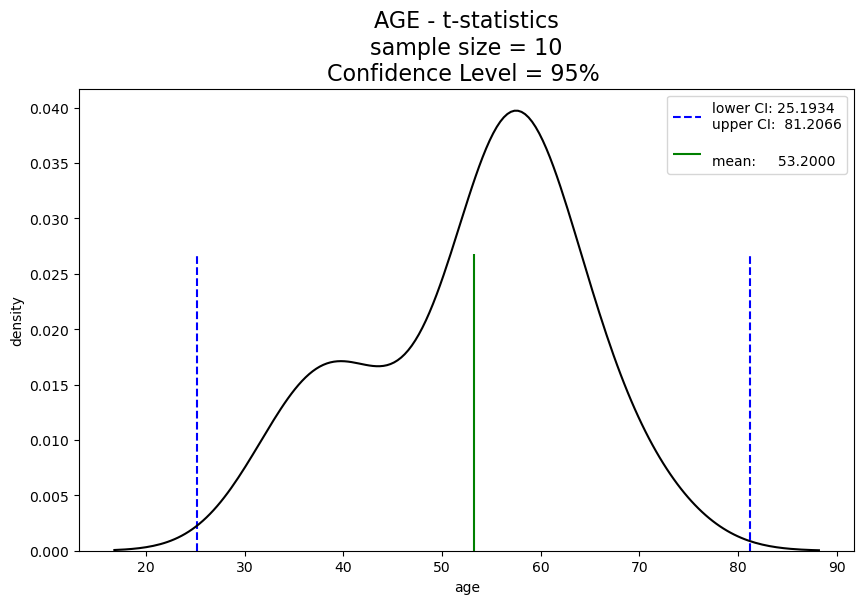

In [34]:
plt.figure(figsize=(10,6))
plt.title('AGE - t-statistics\nsample size = {}\nConfidence Level = {:.0%} '.format(n,confidenceLevel), fontsize=16)
plt.ylabel('density')

labelCI=("lower CI: {:.4f}\nupper CI:  {:.4f}".format(lowerCI,upperCI))
labelME=("\nmean:     {:.4f}".format(mean))
plt.vlines([lowerCI,upperCI],0,np.mean(stats.norm.pdf(heart_age_sample, loc=mean, scale=s)),label=labelCI,color='blue',ls='--')
plt.vlines(mean,0,np.mean(stats.norm.pdf(heart_age_sample, loc=mean, scale=s)),label=labelME,color='green')
plt.legend(loc='best')

sns.distplot(heart_age_sample, hist=False, color='k')
plt.show()


In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform Two-Way ANOVA
# Dependent variable: chol (cholestrol level)
# Independent variables: cp (chest pain type) and fbs (fasting blood sugar)
anova_formula = 'chol ~ C(cp) + C(fbs) + C(cp):C(fbs)'
model = ols(anova_formula, data=heart).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA results
print(anova_table)


                     sum_sq     df         F    PR(>F)
C(cp)           5178.045673    3.0  0.635856  0.592432
C(fbs)           320.618777    1.0  0.118115  0.731333
C(cp):C(fbs)    5209.744566    3.0  0.639749  0.589966
Residual      800769.714670  295.0       NaN       NaN


In [36]:
# Perform one-Way ANOVA
# Dependent variable: chol (cholestrol level)
# Independent variables: cp (chest pain type)
anova_formula = 'chol ~ C(cp)'
model = ols(anova_formula, data=heart).fit()
anova1_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA results
print(anova1_table)

                 sum_sq     df         F    PR(>F)
C(cp)       5000.799875    3.0  0.618148  0.603727
Residual  806300.078013  299.0       NaN       NaN


In [37]:
# Simple Linear Regression: age vs cholesterol
X = heart['age']
y = heart['chol']

# Add constant (for intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   chol   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     14.40
Date:                Fri, 23 Aug 2024   Prob (F-statistic):           0.000179
Time:                        10:33:15   Log-Likelihood:                -1618.6
No. Observations:                 303   AIC:                             3241.
Df Residuals:                     301   BIC:                             3249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        179.9675     17.712     10.161      0.0

In [38]:
# Multiple Linear Regression: age, resting BP, cholesterol predicting heart attack likelihood (outcome is binary)
X = heart[['age', 'trtbps']]
y = heart['chol']

# Add constant (for intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   chol   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     7.900
Date:                Fri, 23 Aug 2024   Prob (F-statistic):           0.000453
Time:                        10:33:15   Log-Likelihood:                -1617.9
No. Observations:                 303   AIC:                             3242.
Df Residuals:                     300   BIC:                             3253.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        159.1510     25.044      6.355      0.0

In [39]:
from sklearn.linear_model import LogisticRegression
X = heart[['age', 'sex', 'cp']]
y = heart['output']
# Initialize and fit logistic regression
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Coefficients and score
print("Coefficients:", log_reg.coef_)
print("Intercept:", log_reg.intercept_)
print("Score:", log_reg.score(X, y))  # Accuracy

Coefficients: [[-0.07015929 -1.54188764  0.99182379]]
Intercept: [4.19318796]
Score: 0.7491749174917491


In [78]:
from scipy.stats import chisquare

# Assuming 'observed' is your observed frequency data
observed = heart['cp']

# Calculate the expected distribution based on observed data
expected_sum = sum(observed)
expected = [expected_sum / len(observed)] * len(observed)

# Chi-Square Goodness of Fit
chi2_stat, p_value = chisquare(observed, f_exp=expected)

print(f"Chi-Square Statistic: {chi2_stat}, P-value: {p_value}")


Chi-Square Statistic: 332.6484641638224, P-value: 0.10857832886821127


In [76]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(heart['exng'], heart['output'])

# Chi-Square Test of Independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}, P-value: {p_value}")


Chi-Square Statistic: 55.94454996665093, P-value: 7.454409331235655e-14
